In [39]:
import numpy as np
import matplotlib.pyplot as plt

mass_organization = [0, 50, 100, 200, 300, 400, 500]

wood_newtons = [0.6, 0.8, 1.0, 1.3, 1.7, 2.0, 2.4]
dwood_newtons = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]

fabric_newtons = [0.7, 0.8, 0.9, 1.2, 1.4, 1.7, 1.9]
dfabric_newtons = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

El coeficiente de fricción dinámica está dado por:

$$ F = \mu_{D}\ N $$
$$ F = \frac{\mu_{D}}{M\ g}

Despejando tenemos:

$$ \mu_{D} = \frac{F}{M\ g} $$

In [40]:
# Calculo del coeficiente de friccion dinámica

def coef_din(masa_bloque, fuerza, dfuerza):
    coef = fuerza / (masa_bloque * 9.8)
    dcoef = 
    return coef, dcoef

SyntaxError: invalid syntax (1593504215.py, line 5)

# Calculando la masa (en gramos)


In [34]:
masa = []

for i in range(len(wood_newtons)):
    for j in range(i+1, len(wood_newtons)):  # Iteramos sobre los índices restantes para evitar duplicados
        m = (((mass_organization[j] / wood_newtons[j]) - (mass_organization[i] / wood_newtons[i])) * ( (wood_newtons[j] * wood_newtons[i]) / (wood_newtons[j] - wood_newtons[i])))
        
        masa.append(m)

print(masa)

[149.99999999999994, 149.99999999999997, 171.42857142857142, 163.63636363636363, 171.42857142857144, 166.66666666666669, 150.00000000000003, 190.0, 172.22222222222223, 183.33333333333334, 175.0, 233.3333333333333, 185.71428571428572, 200.0, 185.71428571428575, 125.00000000000006, 171.42857142857147, 154.54545454545462, 266.6666666666667, 185.7142857142858, 100.00000000000013]


(array([ 2.,  6., 11.,  1.,  1.]),
 array([100.        , 133.33333333, 166.66666667, 200.        ,
        233.33333333, 266.66666667]),
 <BarContainer object of 5 artists>)

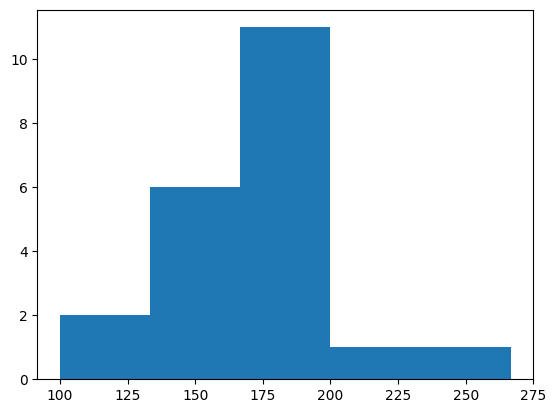

In [38]:
plt.hist(masa, bins = 5)

In [46]:
print("El promedio es: %.2f " %np.mean(masa))
print("La desviación estándar es: %.2f " %np.std(masa))

El promedio es: 173.90 
La desviación estándar es: 33.60 
